In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
import matplotlib.ticker as mtick
import calendar

In [2]:
df = pd.read_csv('Terry_stops_cleaned.csv')
df.head()

,subject_age_group,stop_resolution,weapon_type,officer_id,officer_age,officer_gender,officer_race,subject_perceived_race,subject_perceived_gender,reported_date,...,final_call_type,call_type,officer_squad,arrest_flag,frisk_flag,precinct,sector,beat,year,month
0,Not Specified,Arrest,None,7500,37,M,Black or African American,Asian,Male,2015-10-16,...,NaN,NaN,SOUTH PCT 1ST W - ROBERT,0,0.0,South,O,O2,2015,10
1,Not Specified,Field Contact,None,5670,56,M,White,Unknown,Unknown,2015-03-19,...,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN,2015,3
2,Not Specified,Field Contact,None,7539,58,M,White,Unknown,Unknown,2015-04-01,...,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN,2015,4
3,Not Specified,Field Contact,None,6973,44,M,White,Black or African American,Male,2015-04-03,...,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN,2015,4
4,Not Specified,Field Contact,None,7402,48,M,White,Black or African American,Male,2015-04-05,...,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN,2015,4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47972 entries, 0 to 47971
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   subject_age_group         47972 non-null  object 
 1   stop_resolution           47972 non-null  object 
 2   weapon_type               47972 non-null  object 
 3   officer_id                47972 non-null  int64  
 4   officer_age               47972 non-null  int64  
 5   officer_gender            47972 non-null  object 
 6   officer_race              47972 non-null  object 
 7   subject_perceived_race    47972 non-null  object 
 8   subject_perceived_gender  47972 non-null  object 
 9   reported_date             47972 non-null  object 
 10  initial_call_type         34964 non-null  object 
 11  final_call_type           34964 non-null  object 
 12  call_type                 34964 non-null  object 
 13  officer_squad             47412 non-null  object 
 14  arrest

### Terry Stops by Subject's Race

I want to see the % breakdown by race with the dataset and compare it to census data to see if the two are proportional.

In [24]:
# % of value counts by subject race

df['subject_perceived_race'].value_counts(normalize=True)

White                                        0.489181
Black or African American                    0.298549
Unknown                                      0.094868
Hispanic                                     0.034729
Asian                                        0.032915
American Indian or Alaska Native             0.028621
Multi-Racial                                 0.016593
Other                                        0.003106
Native Hawaiian or Other Pacific Islander    0.001438
Name: subject_perceived_race, dtype: float64

In [25]:
# Keep races with terry stop %'s greater than 0.49%' 
# hard-coded race, terry stop %'s and census race %'s
# census data was pulled from here:
# https://www.seattle.gov/opcd/population-and-demographics/about-seattle#raceethnicity

race_category = ['White',
  'Black or African American',
  'Hispanic',
  'Asian',
  'American Indian or Alaska Native',
  'Multi-Racial']

terry_stop_percent = [0.489, 0.298, 0.034, 0.032, 0.028, 0.016]

census_percent = [0.645, 0.068, 0.066, 0.149, 0.005, 0.06]

In [27]:
#  Created datarfame from lists created above

race_df = pd.DataFrame({'race':race_category,
                        'terry_stops':terry_stop_percent,
                        'census':census_percent}).set_index(['race'])

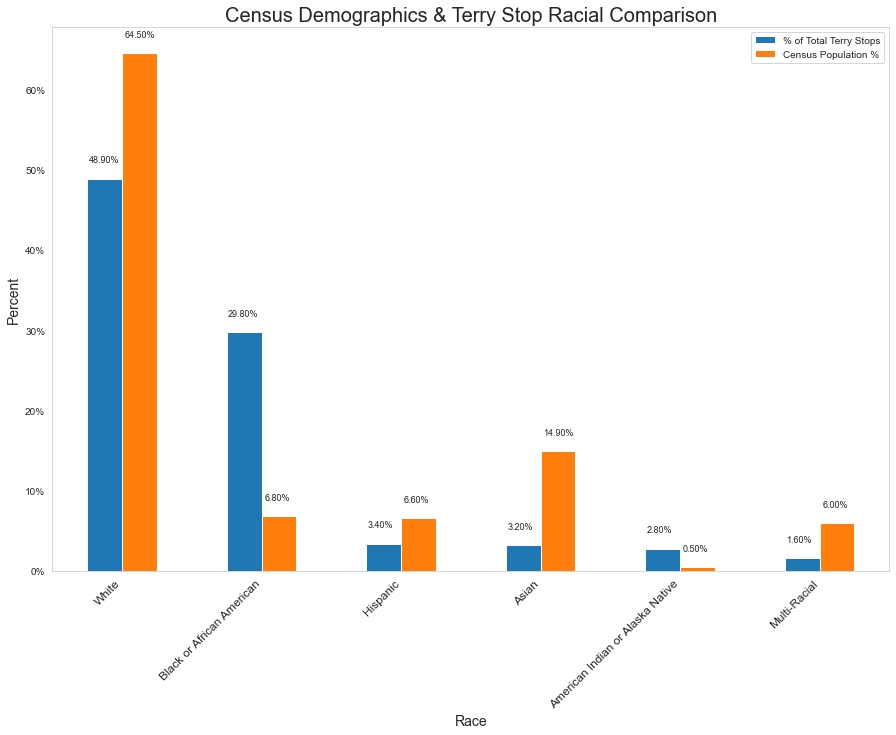

In [95]:
# plotted terry stop and census % data by race for comparison

ax = race_df.plot(kind = 'bar', figsize = (15,10))

for i, v in enumerate(race_df.terry_stops):
    ax.text(i-.24, v+.02, '{:.2f}%'.format(100*v),fontsize = 9 )

for i, v in enumerate(race_df.census):
    ax.text(i+.02, v+.02, '{:.2f}%'.format(100*v),fontsize = 9 )

_=plt.title('Census Demographics & Terry Stop Racial Comparison', fontsize = 20)
_=plt.xlabel('Race', fontsize = 14)
_=plt.ylabel('Percent', fontsize = 14)
_=plt.legend(loc = 'best', labels = ['% of Total Terry Stops', 'Census Population %'] )
_=plt.xticks(rotation = 45, ha='right', fontsize = 12)
_=ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))
plt.show()

White, hispanic, asian, and multi-racial races seem to have a proportional relationship between the % of terry stops and demographic population. The Black or African American race and to a slighter degree, American Indian or Alaska Native racehas have a disproportionate % of terry stops compared to its demographic population. While they only represent 6.8% of the population, they represent 29.8% of all terry stops since 2015.

### Terry Stops by Month

The important features highlighted by our final model indicated that the year of the arrest played an important factor in predicting whether a terry stop leads to an arrest. I want to see how terry stops trend by month and year. With more time, I would have also included a line graph by month-year.

In [44]:
# copied month column into new dataframe and added a count column

month_df = df['month'].copy()
month_df = pd.DataFrame(month_df)
month_df['count'] = 1

In [67]:
# grouped by the month column and summed the count column
# convered the month number to the month name

month_graph = month_df.groupby(['month'], as_index=False)['count'].sum()
month_graph['month'] = month_graph['month'].apply(lambda x: calendar.month_abbr[x])

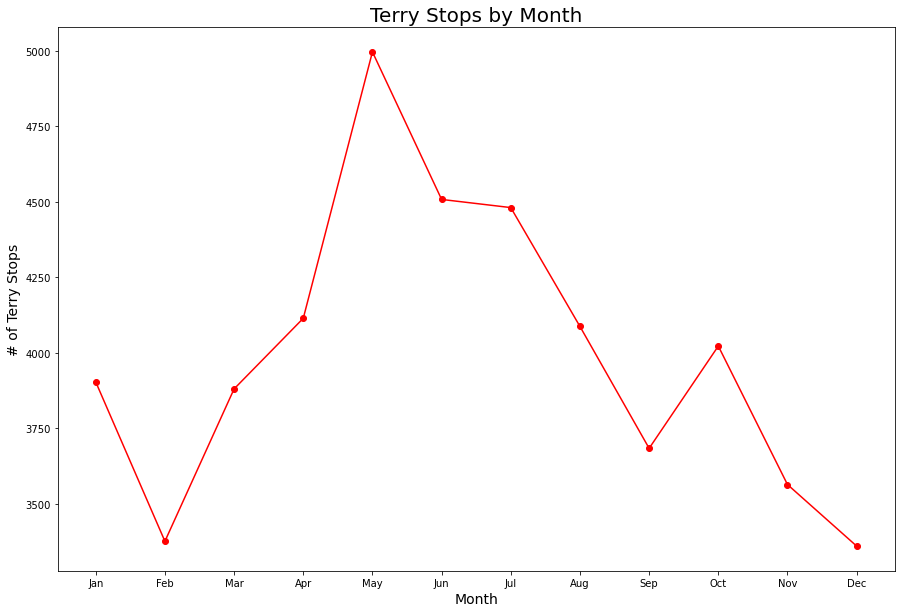

In [62]:
# plotted # of terry stops by each month over the 5 years from the dataset

plt.figure(figsize=(15,10))
plt.plot(month_graph['month'], month_graph['count'], color='red', marker='o')
plt.title('Terry Stops by Month', fontsize=20)
plt.xlabel('Month', fontsize=14)
plt.ylabel('# of Terry Stops', fontsize=14)
plt.grid(False)

plt.show()

### Terry Stops by Year

In [63]:
# copied year column into new dataframe and added a count column

year_df = df['year'].copy()
year_df = pd.DataFrame(year_df)
year_df['count'] = 1

In [97]:
# grouped by the month column and summed the count column

year_graph = year_df.groupby(['year'], as_index=False)['count'].sum()

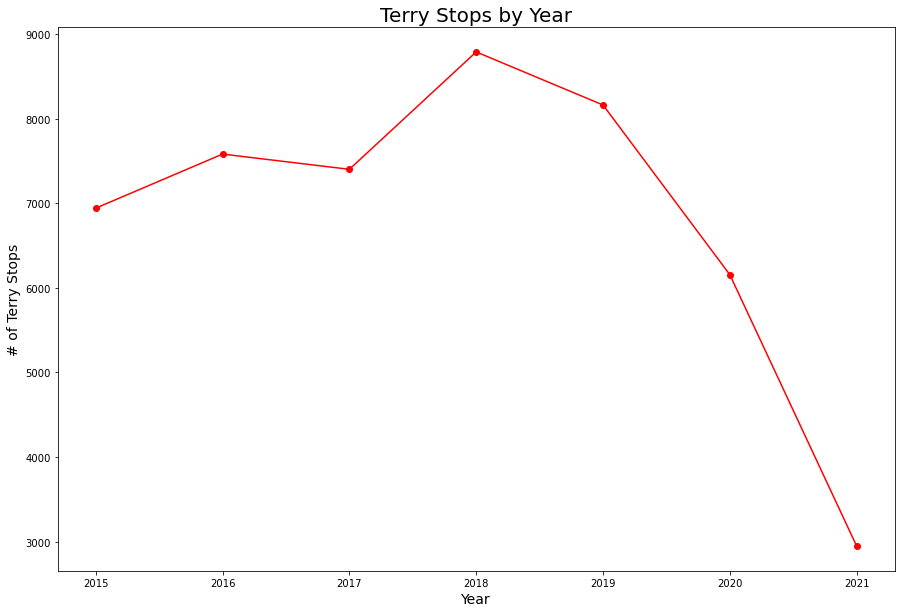

In [68]:
# plotted # of terry stops by year

plt.figure(figsize=(15,10))
plt.plot(year_graph['year'], year_graph['count'], color='red', marker='o')
plt.title('Terry Stops by Year', fontsize=20)
plt.xlabel('Year', fontsize=14)
plt.ylabel('# of Terry Stops', fontsize=14)
plt.grid(False)

plt.show()

The terry stops by month graph shows that the month with the highest terry stop count over the 5 years of the data set occured in May and June. A rough hypothesis is there might be a connection between the warmer weather and uptick in crimes creating tension between the public and police.

The terry stops by year graph shows that the highest count of terry stops occured in 2018. It decreased dramatically after 2019. COVID-19 explains the drop from 2020 to 2021, but I have no initial ideas on what led to the decrease from 2019 to 2020.

### Terry Stops by Officer Age

Another key feature highlighted in the final model was the officer's age. I binned the years in groups of 10 so see if any trends would arise.

In [69]:
# copied officer age column into new dataframe and added a count column

age_df = df['officer_age']
age_df = pd.DataFrame(age_df)
age_df['count'] = 1

In [98]:
#added age bin columns to make plotting more presentable

bins = [0,30,40,50,60,70]
labels = ['20-30','31-40','41-50','51-60','61-N']
age_df['officer_age_bin'] = pd.cut(df['officer_age'], bins,labels=labels, include_lowest = True)


In [100]:
# grouped by the age_bin column column and summed the count column

age_graph = age_df.groupby(['officer_age_bin'], as_index=False)['count'].sum()

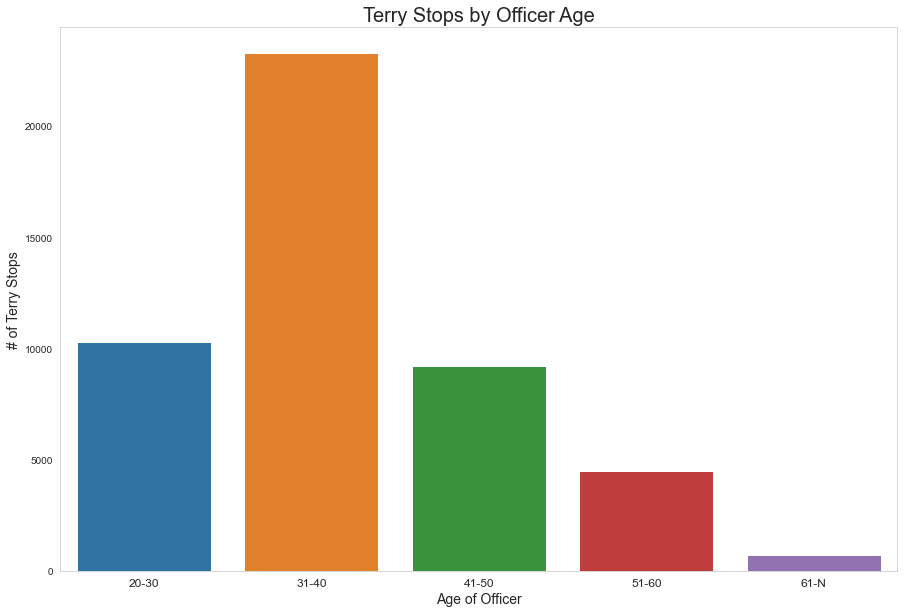

In [94]:
# plotted # of terry stops by officer age bins

fig, ax = plt.subplots(figsize=(15,10))
sns.set_style("whitegrid", {'axes.grid' : False})
sns.barplot(x=age_graph['officer_age_bin'],y=age_graph['count'], data=age_graph)

ax.set_xlabel("Age of Officer", fontsize=14)
ax.set_ylabel("# of Terry Stops", fontsize=14)

ax.set_title("Terry Stops by Officer Age",fontsize=20)
plt.xticks(fontsize=12);

The Terry Stops graph shows that officer's between the age of 31 and 40 have the highest count of terry stops. I wonder if this due to generational values and if that trend will continue as those officers get older. Will the officer's age 20 to 30 will continue to maintain their current trend or as they get older and have more experience will feel more comfortable initiating a terry stop?